In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
import tensorflow

In [ ]:
#import libraries
import tensorflow.keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
from tensorflow.keras import  layers

In [ ]:
train_data_path = "/content/drive/MyDrive/DATASET/FaceMaskDataset/Train"
validation_data_path = "/content/drive/MyDrive/DATASET/FaceMaskDataset/Validation"

In [ ]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 200x200
                                      batch_size=128,
                                      class_mode='binary') 

Found 10000 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 800 images belonging to 2 classes.


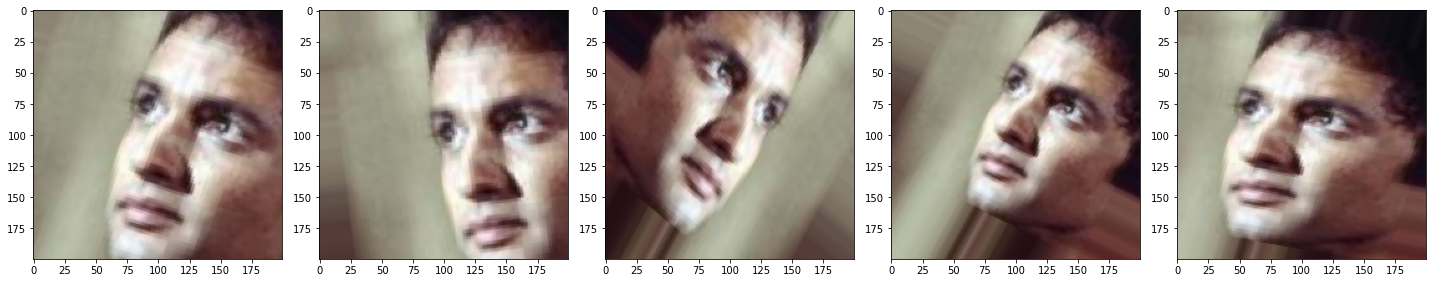

In [ ]:
# showing augmented images
images = [training_data[0][0][1] for i in range(5)]
plotImages(images)

In [ ]:
# save best model using all accuracy
model_path = '/content/drive/My Drive/DATASET/model/new_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#Building cnn model
cnn_model = tf.keras.models.Sequential([
                                    
                                    layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    layers.MaxPooling2D(pool_size=(4,4)),
                                    layers.Conv2D(filters=64, kernel_size=4),
                                    layers.MaxPooling2D(pool_size=(3,3)),
                                    layers.Conv2D(filters=128, kernel_size=3),
                                    layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    layers.Conv2D(filters=256, kernel_size=2),
                                    layers.MaxPooling2D(pool_size=(2,2)),

                                    layers.Dropout(0.5),                                                                        
                                    layers.Flatten(), # neural network beulding
                                    layers.Dense(units=128, activation='relu'), # input layers
                                    layers.Dropout(0.1),                                    
                                    layers.Dense(units=256, activation='relu'),                                    
                                    layers.Dropout(0.25),                                    
                                    layers.Dense(units=2, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
# train cnn model
history = cnn_model.fit_generator(training_data, 
                          epochs=20, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
79/79 [==============================] - ETA: 0s - loss: 0.3659 - accuracy: 0.8447 
Epoch 1: val_accuracy improved from -inf to 0.92000, saving model to /content/drive/My Drive/DATASET/model/new_model.h5
79/79 [==============================] - 1923s 24s/step - loss: 0.3659 - accuracy: 0.8447 - val_loss: 0.2296 - val_accuracy: 0.9200
Epoch 2/20
79/79 [==============================] - ETA: 0s - loss: 0.2506 - accuracy: 0.9084
Epoch 2: val_accuracy improved from 0.92000 to 0.93750, saving model to /content/drive/My Drive/DATASET/model/new_model.h5
79/79 [==============================] - 509s 6s/step - loss: 0.2506 - accuracy: 0.9084 - val_loss: 0.1938 - val_accuracy: 0.9375
Epoch 3/20
79/79 [==============================] - ETA: 0s - loss: 0.2252 - accuracy: 0.9197
Epoch 3: val_accuracy improved from 0.93750 to 0.95625, saving model to /content/drive/My Drive/DATASET/model/new_model.h5
79/79 [==============================] - 504s 6s/step - loss: 0.2252 - accuracy: 0.9197 -

In [15]:
cnn_model.save('/content/drive/My Drive/DATASET/model/model_last.h5')

In [16]:
his=history.history.keys()

In [17]:
import matplotlib.pyplot as plt

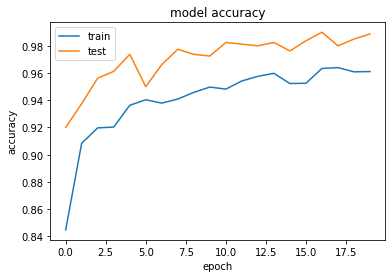

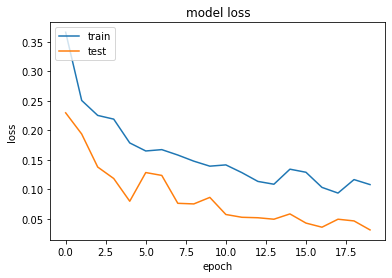

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('LossVal_loss')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('AccVal_acc')